In [1]:
#import necessary modules

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, assemble, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

import numpy as np

In [2]:
# def initialise_grid():

#     positions_o = [0,1]
#     positions_x = [2]
#     entangled_pairs = [(3,4), (5,6), (7,8)]

#     return positions_o, positions_x, entangled_pairs

In [3]:
# def create_singular_gridList(posO, posX, ePairs):
#     gridList = [0,0,0,0,0,0,0,0,0]

#     for i in range(len(posO)):
#         gridList[posO[i]] = 0

#     for i in range(len(posX)):
#         gridList[posX[i]] = 1


#     entangledNum = 1
#     for i in range(len(ePairs)):
#         gridList[ePairs[i][0]]='e'+str(entangledNum)   
#         gridList[ePairs[i][1]]='e'+str(entangledNum)
#         entangledNum +=1

#     return gridList


In [4]:
def showGrid(grid):
    print('This the initial table state inputed by the user:\n0 corresponds to player O, 1 corresponds to player X,\n e1,e2,e3... corresponds to entangled tiles')
    print('--------\n'+str(grid[6])+'|'+str(grid[7])+'|'+str(grid[8]))
    print('--------\n'+str(grid[3])+'|'+str(grid[4])+'|'+str(grid[5]))
    print('--------\n'+str(grid[0])+'|'+str(grid[1])+'|'+str(grid[2]))
    print('--------')

In [5]:
# pO, pX, eP = initialise_grid()

In [6]:
# allStateGrid = create_singular_gridList(pO, pX, eP)

In [7]:
# showGrid(allStateGrid)

In [8]:
# def create_quantumCircuit(finalGrid, pO, pX, eP):
#     #Quantum circuit to represent the tiles
#     #Create a Quantum Circuit acting on the q register
#     circuit = QuantumCircuit(9, 9)
#     circuit.name = "Tic tac toe"

#     #all player O gates are already |0>

#     #making all player X gates |1>
#     for i in range(len(pX)):
#         circuit.x(pX[i])

#     #creating entangled pairs. Set one to hadamard, cnot it with another that has X gate - so if Hadamard is 1, other is flipped to 0
#     for i in range(len(eP)):
#         circuit.h(eP[i][0]) #hardamard gate on line 1
#         circuit.x(eP[i][1]) #x gate on line 2
#         circuit.cx(eP[i][0], eP[i][1]) #cnot between line 1 and line 2

#     circuit.measure(list(range(9)), list(range(9)))

#     return circuit

In [9]:
def probabilityToAngle(player, p):
    if player == 'Y':
        #this is returns the angle for the probability of it being 0.
        return ((np.pi/100) * (100 - p))
    else:
        return ((np.pi/100) * (p))

In [30]:
def probabilityToAngle2(player, p):
    if player == 'Y':
        #this is returns the angle for the probability of it being 0
        return (2 * (np.arccos(np.sqrt(p/100))))
    else:
        return (2 * (np.arcsin(np.sqrt(p/100))))

In [31]:
testArray = [[0, 30, 'X'], [2, 30, 'Y'], [6, 50, 'X'], [5, 50, 'Y'], [8, 70, 'X'], [3, 70, 'Y'], [4, 40, 'X'], [7, 40, 'Y'], [3, 100, 'X']]
#testArray2 = [[6, 70, 'Y'], [4, 30, 'X'], [0, 70, 'X'], [8, 30, 'Y'], [7, 60, 'Y'], [2, 40, 'X'], [5, 50, 'X'], [1, 50, 'Y'], [3, 100, 'X']]

#The probabilities do not add up. there are some un entangled pairs

def convert_to_nice_grid(ticTacGrid):
    entangledArray = []
    xStateArray = []
    oStateArray = []

    lenGrid = len(ticTacGrid)
    for i in range(0,lenGrid-1,2):
        #print(i)
        entangledArray.append( (ticTacGrid[i], ticTacGrid[i+1]) )

    if (ticTacGrid[8][2] == 'X'):
        xStateArray.append(ticTacGrid[8])
    else:
        oStateArray.append(ticTacGrid[8])
        
    return entangledArray, xStateArray, oStateArray

eA, xSA, oSA = convert_to_nice_grid(testArray)
print(eA, xSA, oSA)


'''
want to get form entangled-array, x-state-array, o-state-array
entangled-array = [ (x_grid_loc, y_grid_loc, x_prob) ]
x-state-array = [grid-loc]
o-state-array = [grid-loc]
'''


[([0, 30, 'X'], [2, 30, 'Y']), ([6, 50, 'X'], [5, 50, 'Y']), ([8, 70, 'X'], [3, 70, 'Y']), ([4, 40, 'X'], [7, 40, 'Y'])] [[3, 100, 'X']] []


'\nwant to get form entangled-array, x-state-array, o-state-array\nentangled-array = [ (x_grid_loc, y_grid_loc, x_prob) ]\nx-state-array = [grid-loc]\no-state-array = [grid-loc]\n'

In [32]:
#X has to start for this method to work

def create_quantumCircuit_rx(pO, pX, entangledArray):
    #Quantum circuit to represent the tiles
    #Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(9, 9)
    circuit.name = "Tic tac toe"

    #all player O gates are already |0>

    #making all player X gates |1>
    if (len(pX) > 0):
        circuit.x(pX[0][0])

    #creating entangled pairs. Set one to hadamard, cnot it with another that has X gate - so if Hadamard is 1, other is flipped to 0
    for i in range(len(entangledArray)):
        #tempProb = probabilityToAngle('X', entangledArray[i][0][1])
        #probabilityToAngle2
        tempProb = probabilityToAngle2('X', entangledArray[i][0][1])
        circuit.rx(tempProb, entangledArray[i][0][0]) #line 1 set to correct angle
        #circuit.h(eP[i][0]) #hardamard gate on line 1
        circuit.x(entangledArray[i][1][0]) #x gate on line 2
        circuit.cx(entangledArray[i][0][0], entangledArray[i][1][0]) #cnot between line 1 and line 2

    circuit.measure(list(range(9)), list(range(9)))

    return circuit

30
nan
50
nan
70
nan
40
nan
This is the corresponding quantum circuit from the users input


/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_68472/2665973564.py:3: RuntimeWarning: invalid value encountered in arcsin
  print((2 * (np.arcsin(np.sqrt(p)))))


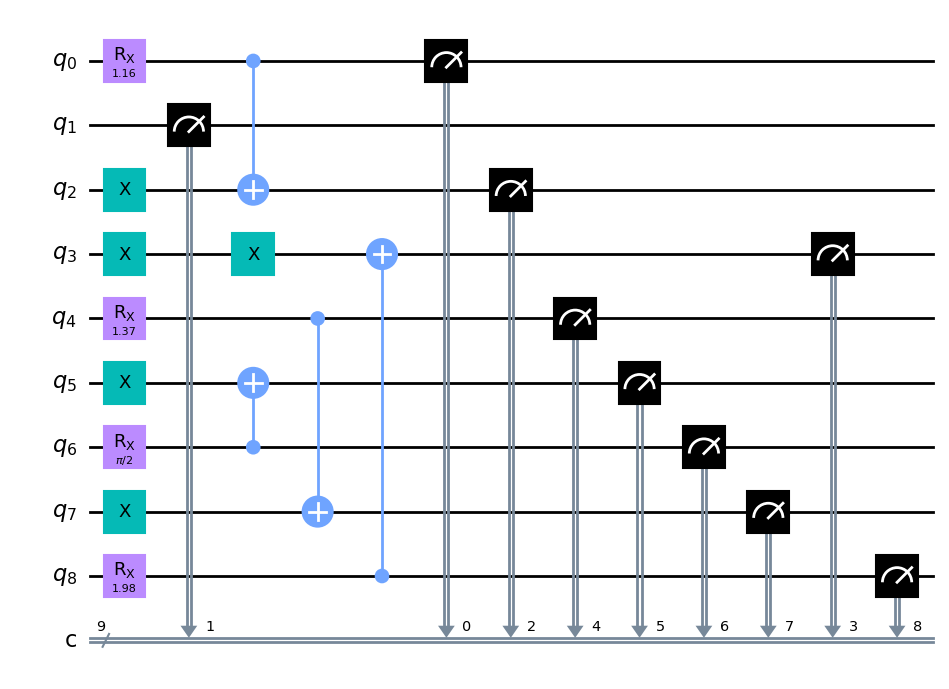

In [33]:
eA, xSA, oSA = convert_to_nice_grid(testArray)

qCircuit = create_quantumCircuit_rx(oSA, xSA, eA)

# Print out the circuit
print('This is the corresponding quantum circuit from the users input')
#draw circuit
qCircuit.draw(output='mpl', filename='circuit.png')

In [34]:
# Check winner
def check_winner(board,mark):
    return(((board[0]==mark) and (board[1]== mark) and (board[2]==mark) )or #for row1 

            ((board[3]==mark) and (board[4]==mark) and (board[5]==mark) )or #for row2

            ((board[6]==mark) and (board[7]==mark) and (board[8]==mark) )or #for row3

            ((board[0]==mark) and (board[3]==mark) and (board[6]== mark) )or #for Colm 1 

            ((board[1]==mark) and (board[4]==mark) and (board[7]==mark) )or #for Colm 2

            ((board[2]==mark) and (board[5]==mark) and (board[8]==mark) )or #for colm 3

            ((board[0]==mark) and (board[4]==mark) and (board[8]==mark) )or #diagonal 1

            ((board[2]==mark) and (board[4]==mark) and (board[6]==mark) )) #diagonal 2

In [35]:
def runGame(qc):

    flag_p1=1 
    flag_p2=0

    while (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
        print('Running the quantum circuit...')
        flag_p1=0 
        flag_p2=0

        #collapse states
        job = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=1)
        result = job.result()
        l_final_ordered=list(map(lambda x: int(x),list(list(result.get_counts().keys())[0][::-1])))
        print(l_final_ordered)
        #list with ordered cells
        print('The colapsed state is:')
        print('-----\n'+str(l_final_ordered[6])+'|'+str(l_final_ordered[7])+'|'+str(l_final_ordered[8]))
        print('-----\n'+str(l_final_ordered[3])+'|'+str(l_final_ordered[4])+'|'+str(l_final_ordered[5]))
        print('-----\n'+str(l_final_ordered[0])+'|'+str(l_final_ordered[1])+'|'+str(l_final_ordered[2]))
        print('-----')

        if (check_winner(l_final_ordered,0) ):## to check if player 1 won
            print('Player 1 won!')
            flag_p1 = 1
        else:
            flag_p1 = 0

        if (check_winner(l_final_ordered,1)): ## to check if player 2 won
            print('Player 2 won!')
            flag_p2 = 1
        else:
            flag_p2 = 0

        if (flag_p1 or flag_p2) and not(flag_p1 and flag_p2):
            break

        if flag_p1 and flag_p2:
            print('The game will repeat until one one player wins')

        if not(flag_p1 and flag_p2):
            print('No winners,\nThe game will repeat until one one player wins')

In [36]:
# run game on test quantum circuit

runGame(qCircuit)

Running the quantum circuit...
[0, 0, 1, 1, 1, 1, 0, 0, 1]
The colapsed state is:
-----
0|0|1
-----
1|1|1
-----
0|0|1
-----
Player 2 won!


In [41]:
def runAlgorithm(input_tictacGrid):
    entArray, xSArray, oSArray = convert_to_nice_grid(input_tictacGrid)

    quantumCircuit = create_quantumCircuit_rx(oSArray, xSArray, entArray)

    #quantumCircuit.draw(output='mpl', filename='circuit.png')

    runGame(quantumCircuit)

In [44]:
import tkinter as tk
from tkinter import *

#importing quantum code

#from ipynb.fs.full.tictactoe import runGame


def draw_board():
    canvas.create_line(100, 0, 100, 300)
    canvas.create_line(200, 0, 200, 300)
    canvas.create_line(0, 100, 300, 100)
    canvas.create_line(0, 200, 300, 200)

root = tk.Tk() # creates a tkinter window  -- main window represented buy "root"
canvas = tk.Canvas(root, width=300, height=300) # creates a canvas to display in tkinter window ("root)-- canvas is a rectangular widget 
canvas.pack() # .pack() displays widget on screen (in this case, the widget is a canvas)
draw_board()

#create empty lists with the positions of x, o, and entangled pairs

is_full = [0, 0, 0, 0, 0, 0, 0, 0, 0]
played_buttons = []

entangled = []
turnCounter = 1

players = ["X", "Y"]




#def entangle():
#def run_game():
    #code for collapsing quantum states

thirty_button_x = Button(root, text="30X", command=lambda: place_val(30, "X"))
forty_button_x = Button(root, text="40X", command=lambda: place_val(40, "X"))
fifty_button_x = Button(root, text="50X", command=lambda: place_val(50, "X"))
sixty_button_x = Button(root, text="60X", command=lambda: place_val(60, "X"))
seventy_button_x = Button(root, text="70X", command=lambda: place_val(70, "X"))
hundred_button_x = Button(root, text="100X", command=lambda: place_val(100, "X"))


thirty_button_y = Button(root, text="30Y", command=lambda: place_val(30, "Y"))
forty_button_y = Button(root, text="40Y", command=lambda: place_val(40, "Y"))
fifty_button_y = Button(root, text="50Y", command=lambda: place_val(50, "Y"))
sixty_button_y = Button(root, text="60Y", command=lambda: place_val(60, "Y"))
seventy_button_y = Button(root, text="70Y", command=lambda: place_val(70, "Y"))

all_buttons = [thirty_button_x, forty_button_x, fifty_button_x, sixty_button_x, seventy_button_x, thirty_button_y, forty_button_y, fifty_button_y, sixty_button_y, seventy_button_y]




def place_val(number, player):
    def on_click(event):
        x = event.x
        y = event.y
        global turnCounter
        turnCounter = turnCounter+1
        row = y // 100
        col = x // 100 
        pos = coord_to_num(row, col)
        val = str(number)+player
        

        
        if is_full[pos] == 0 and is_valid_move(val, player): # checking to make sure cell is empty before placing o
            draw_number(row, col, number, player)
            is_full[pos] = 1
            add_to_entangled(row, col, number, player)
            currentButton = get_button(number, player)
            played_buttons.append([number, player])

            # change player
            newPlayer = changeplayer(player)
            if(turnCounter == 9):
                disable_buttons_except_hundred()
            elif is_comp_turn(turnCounter):
                #complementary_number = get_complementary_number(number)
                complementary_button = get_complementary_button(number, player)
                disable_buttons_except_complementary(complementary_button, currentButton)

            elif not is_comp_turn(turnCounter):
                enable_except_played(played_buttons)
            
            
            
            # now want to disable all buttons except for the complementary button

            
            
    canvas.bind('<Button-1>', on_click)


def add_to_entangled(row, col, number, player):
    entangled.append([coord_to_num(row, col), number, player])


def print_vals():
    print(entangled)
    print(turnCounter)
    print(played_buttons)

def playGame():
    runAlgorithm(entangled)
    

print_button = Button(root, text="print", command=print_vals) ## for debugging purposes 
run_game = Button(root, text="Run Game", command=lambda: playGame)

thirty_button_x.pack()
forty_button_x.pack()
fifty_button_x.pack()
sixty_button_x.pack()
seventy_button_x.pack()
hundred_button_x.pack()


thirty_button_y.pack()
forty_button_y.pack()
fifty_button_y.pack()
sixty_button_y.pack()
seventy_button_y.pack()


print_button.pack()
run_game.pack()



# functions for drawing numbers 30-100  
def draw_number(row, col, number, player):
    x1, y1 = col * 100 + 10, row * 100 + 10
    x2, y2 = (col + 1) * 100 - 10, (row + 1) * 100 - 10
    x_center, y_center = (x1 + x2) // 2, (y1 + y2) // 2
    canvas.create_text(x_center, y_center, text=str(number)+player, font=("Arial", 36))

# ... 30



   

def coord_to_num(row, col):
    num = row * 3 + col 
    # 0-8 going across first, then down 
    return num 

def is_valid_move(number, player):
    if (player == "X" and str(number)[-1] == "X") or (player == "Y" and str(number)[-1] == "Y"):
        return True
    return False



def get_button(number, player):
    if player == "X":
        if number == 30:
            return thirty_button_x
        elif number == 40:
            return forty_button_x
        elif number == 50:
            return fifty_button_x
        elif number == 60:
            return sixty_button_x
        elif number == 70:
            return seventy_button_x
    else:
        if number == 30:
            return thirty_button_y
        elif number == 40:
            return forty_button_y
        elif number == 50:
            return fifty_button_y
        elif number == 60:
            return sixty_button_y
        elif number == 70:
            return seventy_button_y
        
def get_complementary_button(number, player):
    if player == "X":
        if number == 30:
            return seventy_button_y
        elif number == 40:
            return sixty_button_y
        elif number == 50:
            return fifty_button_y
        elif number == 60:
            return forty_button_y
        elif number == 70:
            return thirty_button_y
    else:
        if number == 30:
            return seventy_button_x
        elif number == 40:
            return sixty_button_x
        elif number == 50:
            return fifty_button_x
        elif number == 60:
            return forty_button_x
        elif number == 70:
            return thirty_button_x

def enable_button(button):
    button.config(state=NORMAL)

def disable_button(button):
    button.config(state=DISABLED)


def disable_buttons_except_complementary(comp_button, current_button):
    for player in players:
        for i in range (30, 80, 10):
            button = get_button(i, player)
            if button!=comp_button:
                disable_button(button)
    disable_button(current_button)
    disable_button(hundred_button_x)
    enable_button(get_complementary_button(comp_button))




def enable_except_played(played_buttons_list):
    for button in all_buttons:
        enable_button(button)
    for val in played_buttons_list:
        disable = get_button(val[0], val[1])
        disable_button(disable)
    disable_button(hundred_button_x)
    
    




def changeplayer(current_player):
    if current_player == "X":
        return "Y"
    else:
        return "X"
    
def is_comp_turn(counter):
    if counter%2 == 0:
        return True
    else:
        return False

def disable_buttons_except_hundred():
    for button in all_buttons:
        disable_button(button)
    enable_button(hundred_button_x)
    



root.mainloop() # starts the main event and displays the gui

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/shaanyadav/opt/anaconda3/envs/qiskit/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_68472/1129142770.py", line 83, in on_click
    disable_buttons_except_complementary(complementary_button, currentButton)
  File "/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_68472/1129142770.py", line 221, in disable_buttons_except_complementary
    enable_button(get_complementary_button(comp_button))
TypeError: get_complementary_button() missing 1 required positional argument: 'player'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/shaanyadav/opt/anaconda3/envs/qiskit/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_68472/1129142770.py", line 83, in on_click
    disab

[[0, 30, 'X'], [2, 70, 'Y'], [7, 40, 'X'], [4, 60, 'Y'], [3, 40, 'Y'], [1, 60, 'X'], [6, 70, 'X'], [8, 30, 'Y'], [5, 100, 'X']]
10
[[30, 'X'], [70, 'Y'], [40, 'X'], [60, 'Y'], [40, 'Y'], [60, 'X'], [70, 'X'], [30, 'Y'], [100, 'X']]


In [45]:
print(entangled)

[[0, 30, 'X'], [2, 70, 'Y'], [7, 40, 'X'], [4, 60, 'Y'], [3, 40, 'Y'], [1, 60, 'X'], [6, 70, 'X'], [8, 30, 'Y'], [5, 100, 'X']]


In [46]:
runAlgorithm(entangled)

30
nan
40
nan
40
nan
70
nan
Running the quantum circuit...
[1, 1, 0, 0, 1, 1, 1, 0, 0]
The colapsed state is:
-----
1|0|0
-----
0|1|1
-----
1|1|0
-----
No winners,
The game will repeat until one one player wins


/var/folders/91/nz1r31690rb_44hz9hkx_3rm0000gn/T/ipykernel_68472/2665973564.py:3: RuntimeWarning: invalid value encountered in arcsin
  print((2 * (np.arcsin(np.sqrt(p)))))
